In [4]:
####Factors of College Education that affect Mid-Career Salary 

# Is a college degree worth the financial investment? What factors increase your ROI for an undergraduate college degree? 

###Goal 
#The goal of this project is to identify the factors that contribute to a person's mid-career salary, specifically whether undergraduate major, college name, region, or
#other variables play a role in determining a person's mid-career salary. 


In [5]:
###Setup
##Importing the necessary libraries I will use for this project 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure

In [6]:
##Reading in the Data
degrees_df = pd.read_csv("degrees-that-pay-back.csv")
college_salaries = pd.read_csv("salaries-by-college-type.csv")
region_salaries = pd.read_csv("salaries-by-region.csv") 

In [7]:
#Looking at the degrees df 
display(degrees_df.head())

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [8]:
###Data Cleaning

##Checking for missing data
nan = degrees_df.isna().sum()
display(nan)
#removing null values from data
degrees_df = degrees_df.dropna()
#removing duplicate rows from data
degrees_df = degrees_df.drop_duplicates()

Undergraduate Major                                  0
Starting Median Salary                               0
Mid-Career Median Salary                             0
Percent change from Starting to Mid-Career Salary    0
Mid-Career 10th Percentile Salary                    0
Mid-Career 25th Percentile Salary                    0
Mid-Career 75th Percentile Salary                    0
Mid-Career 90th Percentile Salary                    0
dtype: int64

In [9]:
#checking to see if NaN's dropped successfully
nan = degrees_df.isna()
print(f'The number of NaNs is now {nan.sum().sum()}')
degrees_df.head()

The number of NaNs is now 0


,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [10]:
#checking the data types of the columns
# for col in degrees_df.columns:
    # print(f"{col}: {degrees_df[col].dtype}")

In [11]:
##converting columns to correct data types

#convert salary columns to floats
# cols_to_process = ["Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", "Mid-Career 75th Percentile Salary", "Mid-Career 90th Percentile Salary", "Mid-Career Median Salary", "Starting Median Salary"]
# for col in cols_to_process:
    # degrees_df[col] = degrees_df[col].replace('[\$,]', '', regex=True).astype(float)
    

In [12]:
#checking to see if columns were succesfully converted to correct data types
# for col in degrees_df.columns:
    # print(f"{col}: {degrees_df[col].dtype}")
# display(degrees_df.head())

In [13]:
##melting the data frame
melted_degrees_df = degrees_df.copy()
#renaming Median to 50th Percentile to keep consistency with other columns
melted_degrees_df.rename(columns={'Mid-Career Median Salary': 'Mid-Career 50th Percentile Salary'}, inplace=True)
melted_degrees_df = melted_degrees_df.melt(id_vars=['Undergraduate Major', 'Starting Median Salary', 'Percent change from Starting to Mid-Career Salary'], 
                                           value_vars= ["Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", "Mid-Career 50th Percentile Salary", "Mid-Career 75th Percentile Salary", "Mid-Career 90th Percentile Salary"],
                                           var_name = "Mid-Career Percentile",
                                           value_name = "Mid-Career Percentile Salary")
melted_degrees_df["Mid-Career Percentile"] = melted_degrees_df["Mid-Career Percentile"].str[11:13]
melted_degrees_df.head()

,Undergraduate Major,Starting Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career Percentile,Mid-Career Percentile Salary
0,Accounting,"$46,000.00",67.6,10,"$42,200.00"
1,Aerospace Engineering,"$57,700.00",75.0,10,"$64,300.00"
2,Agriculture,"$42,600.00",68.8,10,"$36,300.00"
3,Anthropology,"$36,800.00",67.1,10,"$33,800.00"
4,Architecture,"$41,600.00",84.6,10,"$50,600.00"


In [14]:
#converting columns to correct data type
for col in melted_degrees_df.columns:
    print(f'{col}:{melted_degrees_df[col].dtype}')

Undergraduate Major:object
Starting Median Salary:object
Percent change from Starting to Mid-Career Salary:float64
Mid-Career Percentile:object
Mid-Career Percentile Salary:object


In [15]:
#convert salary columns to numeric data type
cols_to_convert= ["Mid-Career Percentile", "Mid-Career Percentile Salary", "Starting Median Salary"]
for col in cols_to_convert:
    melted_degrees_df[col] = melted_degrees_df[col].replace('[\$,]', '', regex=True).astype(float)
melted_degrees_df.head()

,Undergraduate Major,Starting Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career Percentile,Mid-Career Percentile Salary
0,Accounting,46000.0,67.6,10.0,42200.0
1,Aerospace Engineering,57700.0,75.0,10.0,64300.0
2,Agriculture,42600.0,68.8,10.0,36300.0
3,Anthropology,36800.0,67.1,10.0,33800.0
4,Architecture,41600.0,84.6,10.0,50600.0


In [16]:
###SAME THING for the other two df's: college_salaries and region_salaries
#Quickly examine df's 
display(college_salaries.head())
display(region_salaries.head())

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [17]:
#Merging college and region datasets
college_full = college_salaries.merge(region_salaries, left_on= 'School Name', right_on= 'School Name', how= 'left', suffixes= ('', '_extra'))
#Let's drop duplicate columns
college_full = college_full.drop(columns = college_full.columns[college_full.columns.str.contains("_extra")])
college_full.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,California
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,Northeastern


In [18]:
#identify and remove NaN's 
nan = college_full.isna().sum()
display(nan)
college_full = college_full.dropna()

School Name                           0
School Type                           0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    38
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 90th Percentile Salary    38
Region                                1
dtype: int64

In [19]:
#check if NaN's were successfully removed
print(f'There are now {college_full.isna().sum().sum()} NaNs in the dataframe')

There are now 0 NaNs in the dataframe


In [20]:
#drop duplicates 
college_full = college_full.drop_duplicates()
#rename Median to 50th percentile to keep naming consistent with other columns
college_full.rename(columns = {'Mid-Career Median Salary': 'Mid-Career 50th Percentile Salary'}, inplace= True)
college_full.head()

,School Name,School Type,Starting Median Salary,Mid-Career 50th Percentile Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern
5,Worcester Polytechnic Institute (WPI),Engineering,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00",Northeastern
6,Carnegie Mellon University (CMU),Engineering,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00",Northeastern
7,Rensselaer Polytechnic Institute (RPI),Engineering,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00",Northeastern


In [21]:
#correcting column data types
for col in college_full.columns:
    print(f'{col}:{college_full[col].dtype}')


School Name:object
School Type:object
Starting Median Salary:object
Mid-Career 50th Percentile Salary:object
Mid-Career 10th Percentile Salary:object
Mid-Career 25th Percentile Salary:object
Mid-Career 75th Percentile Salary:object
Mid-Career 90th Percentile Salary:object
Region:object


In [22]:
#Converting salary columns to numeric 
col_to_process = ['Starting Median Salary', 'Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary', 'Mid-Career 50th Percentile Salary',
                  'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']
for col in col_to_process:
    college_full[col] = college_full[col].replace('[\$,]', '', regex= True).astype('float')

##numerize object columns
college_numerized= college_full.copy()
for col_name in college_numerized.columns:
    if college_numerized[col_name].dtype == 'object':
        college_numerized[col_name] = college_numerized[col_name].astype('category').cat.codes

In [23]:
#check to see if column data types successfully converted
for col in college_numerized.columns:
    print(f'{col}:{college_numerized[col].dtype}')
    
    
college_numerized.head()

School Name:int16
School Type:int8
Starting Median Salary:float64
Mid-Career 50th Percentile Salary:float64
Mid-Career 10th Percentile Salary:float64
Mid-Career 25th Percentile Salary:float64
Mid-Career 75th Percentile Salary:float64
Mid-Career 90th Percentile Salary:float64
Region:int8


,School Name,School Type,Starting Median Salary,Mid-Career 50th Percentile Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
0,55,0,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,2
3,74,0,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,2
5,209,0,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0,2
6,21,0,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0,2
7,78,0,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0,2


In [24]:
### DATA EXPLORATION!

##What undegraduate majors contribute to the highest Mid-Career Salary at each Percentile?



/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


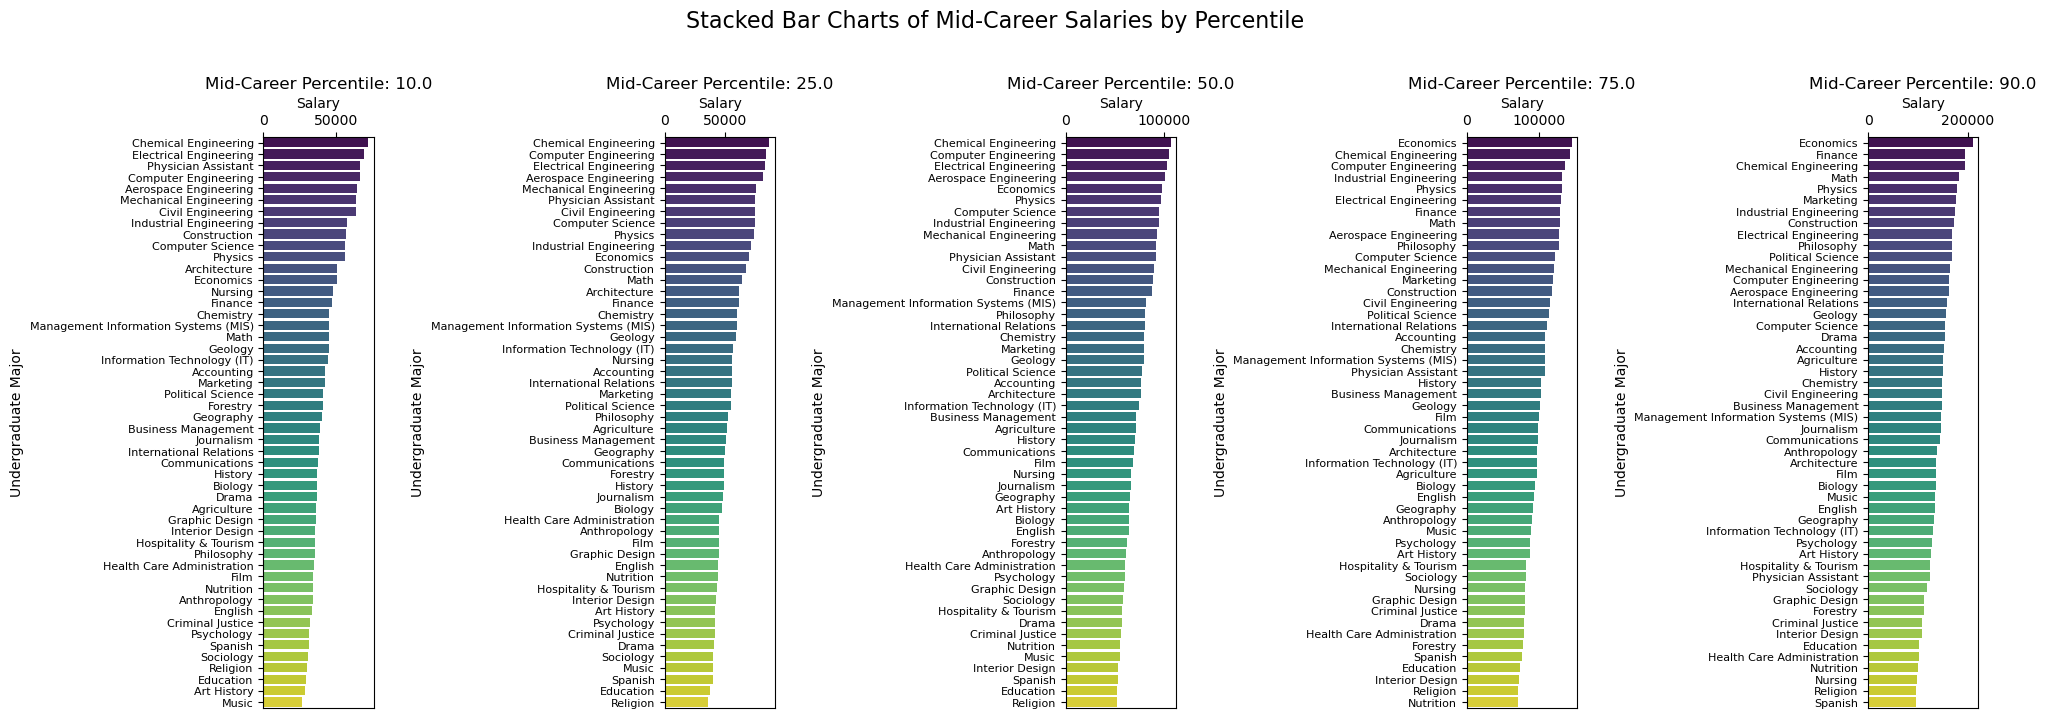

In [25]:
# Sorting the entire DataFrame by "Mid-Career Percentile Salary" in descending order
melted_degrees_df_sorted = melted_degrees_df.sort_values(by=["Mid-Career Percentile", "Mid-Career Percentile Salary"], ascending=[True, False])
melted_degrees_df_sorted.head()


# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 7), sharey=False)  # Set sharey to False

# Create a separate horizontal bar chart for each percentile
for i, (percentile, data) in enumerate(melted_degrees_df_sorted.groupby("Mid-Career Percentile")):
    ax = axes[i]
    sns.barplot(y="Undergraduate Major", x="Mid-Career Percentile Salary", data=data, palette="viridis", ax=ax)  # Swap x and y
    ax.set_title(f"Mid-Career Percentile: {percentile}", fontsize=12)  # Adjust title font size
    ax.set_xlabel("Salary", fontsize=10)  # Adjust x-axis label font size
    ax.set_ylabel("Undergraduate Major", fontsize=10)  # Adjust y-axis label font size
    ax.tick_params(axis='y', labelrotation=0, labelsize=8)  # Rotate y-axis labels for better readability

# Add x-axis numerical values on the top side of each individual plot
for ax in axes:
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")

# Add a common suptitle
plt.suptitle("Stacked Bar Charts of Mid-Career Salaries by Percentile", y=1.02, fontsize=16)  # Adjust suptitle font size

# Adjust layout
plt.tight_layout()
plt.show()


In [26]:
#Chemical Engineering, Computer Engineering, and Economics appear to be some of the top undergraduate majors for Mid-Career Salary across all percentiles. 


In [27]:
### How do various factors affect Mid-Career 50th Percentile Salary


In [28]:
##What is the effect of School Name on Starting Median Salary
# Presort the starting median salary values in descending order
college_sorted = college_full.sort_values(by="Starting Median Salary", ascending=False)
# Assign Rank to each school
college_sorted["Rank"] = college_sorted["Starting Median Salary"].rank(ascending=False, method='dense')
#Let's look at the top 10 schools for Starting Median Salary
top_schools = college_sorted[college_sorted["Rank"] <= 10.0]
# Print the resulting DataFrame
display(top_schools)

,School Name,School Type,Starting Median Salary,Mid-Career 50th Percentile Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region,Rank
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,Northeastern,1.0
87,Princeton University,Ivy League,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0,Northeastern,2.0
89,Harvard University,Ivy League,63400.0,124000.0,54800.0,86200.0,179000.0,288000.0,Northeastern,3.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,Northeastern,4.0
6,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0,Northeastern,5.0
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0,Northeastern,6.0
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0,Northeastern,7.0
90,University of Pennsylvania,Ivy League,60900.0,120000.0,55900.0,79200.0,192000.0,282000.0,Northeastern,8.0
10,Stevens Institute of Technology,Engineering,60600.0,105000.0,68700.0,81900.0,138000.0,185000.0,Northeastern,9.0
91,Cornell University,Ivy League,60300.0,110000.0,56800.0,79800.0,160000.0,210000.0,Northeastern,10.0


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


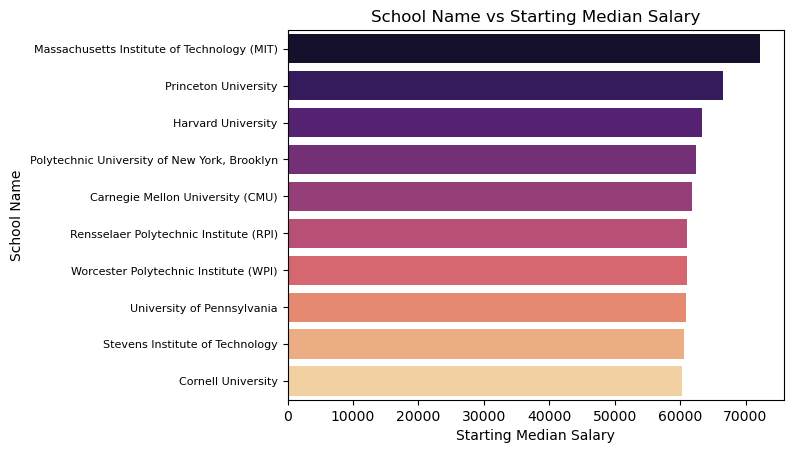

In [29]:
# Create a horizontal bar chart with larger bars
ax = sns.barplot(x='Starting Median Salary', y='School Name', data=top_schools, palette='magma', orient='h', order=top_schools['School Name'])

# Set title and labels
ax.set_title('School Name vs Starting Median Salary', fontsize=12)
ax.set_xlabel('Starting Median Salary', fontsize=10)
ax.set_ylabel('School Name', fontsize=10)
ax.tick_params(axis='y', labelrotation=0, labelsize=8)  # Adjust y-axis labels

# Set y-ticks with correct order
ax.yaxis.set_label_position("left")
# Show the plot
plt.show()


In [30]:
#These are the top schools for Starting Median Salary, which is consistent with Us.News Ranking of those Schools


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


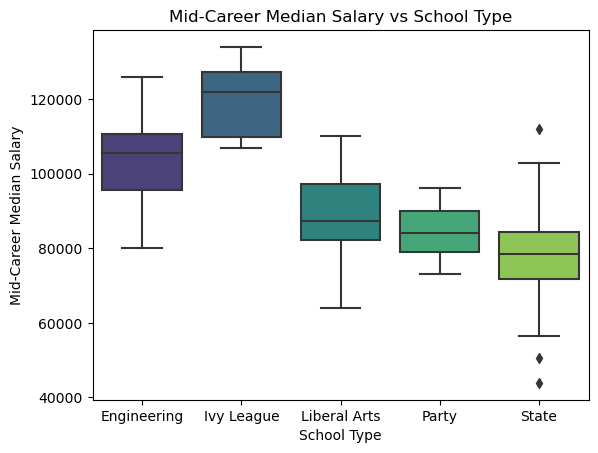

In [31]:
##What is the effect of School Type on Mid-Career Salary
sns.boxplot(x='School Type', y='Mid-Career 50th Percentile Salary', data=college_numerized, palette='viridis')

# Set labels and title
plt.xlabel('School Type')
plt.ylabel('Mid-Career Median Salary')
plt.title('Mid-Career Median Salary vs School Type')

unique_categories = college_full['School Type'].unique()
category_codes = college_numerized['School Type'].unique()



# Set x-tick labels using the mapping
plt.xticks(category_codes, unique_categories)

# Show the plot
plt.show()

In [32]:
# Ivy League and Engineering Schools appear to contribute more significantly to a higher mid-career median salary than liberal arts, party, and state schools.
#This is to be expected.

In [33]:
#Northeastern region schools seem to be the best region contributing to Mid-Career Median Salary. 

In [34]:
#I only want to look at Mid-Career 50th Percentile Salary, so drop the other percentiles 
columns_to_drop = ['Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']
college_numerized = college_numerized.drop(columns=columns_to_drop)
college_numerized.head()

,School Name,School Type,Starting Median Salary,Mid-Career 50th Percentile Salary,Region
0,55,0,72200.0,126000.0,2
3,74,0,62400.0,114000.0,2
5,209,0,61000.0,114000.0,2
6,21,0,61800.0,111000.0,2
7,78,0,61100.0,110000.0,2


In [35]:
##Correlation matrix
corr_matrix = college_numerized.corr()
corr_pairs = corr_matrix.unstack()
#Sort Correlation pairs
sorted_pairs = corr_pairs.sort_values()
#including only pairs that have a correlation greater than 0.5
#a correlation greater than 0.5 signifies a strong correlation
high_pairs = sorted_pairs[(sorted_pairs)>0.5]
high_pairs.head()

Mid-Career 50th Percentile Salary  Starting Median Salary               0.913555
Starting Median Salary             Mid-Career 50th Percentile Salary    0.913555
                                   Starting Median Salary               1.000000
School Type                        School Type                          1.000000
School Name                        School Name                          1.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

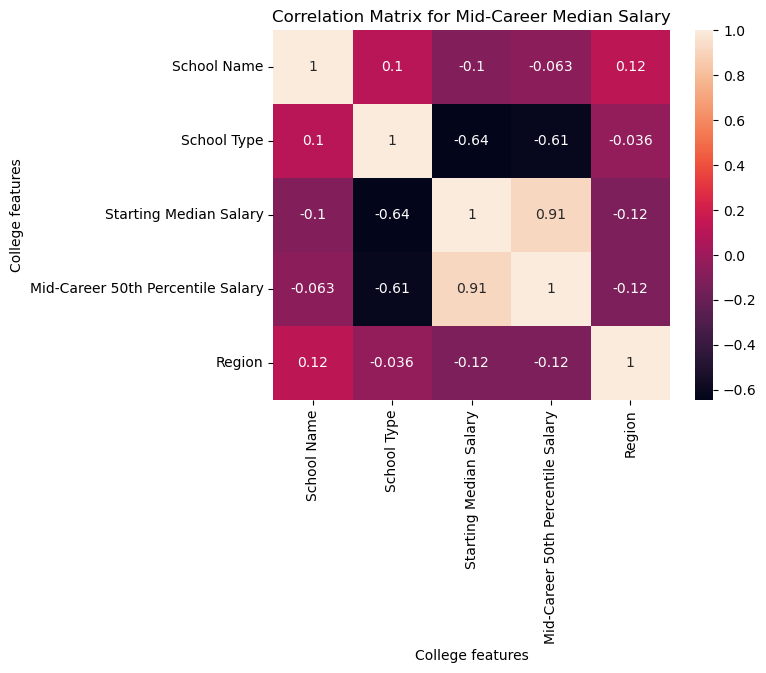

In [36]:
##Visualize the data
correlation_matrix = college_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Mid-Career Median Salary")
plt.xlabel('College features')
plt.ylabel('College features')
plt.show

In [37]:
#Looking at the heatmap, it seems that the only factor that strongly correlates with Mid-Career Median Salary is Starting Median Salary, which makes sense. 
